In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

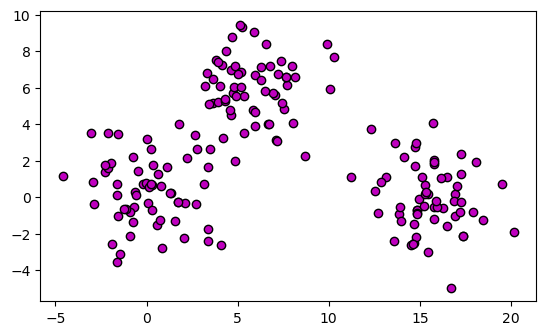

In [27]:
np.random.seed(0)

X = np.random.normal(0, 1.8, [180, 2])
X[60:120, ] += 6
X[120:, 0] += 16

plt.axes(aspect=1)
plt.scatter(X[:, 0], X[:, 1], c='m', edgecolor='k')
plt.show()

In [163]:
n_clusters = 3
max_iterations = 100
toloration = 0.0001
random_indices = np.random.choice(len(X), 
                                 n_clusters,
                                 replace=0)
random_indices

array([106, 170,   7])

In [164]:
init_centroids = X[random_indices]
init_centroids

array([[ 7.41539033,  5.16044563],
       [17.92331692, -0.81609445],
       [ 0.79895382,  0.60061379]])

In [174]:
( ( init_centroids[None] - X[:, None] ) ** 2 ).sum(2) \
    .argmin()

23

In [ ]:
for i in range(max_iterations):
    euler_dist_2 = ( (
        init_centroids[None] -
        X[:, None]
    ) ** 2 ).sum(2)
    group = euler_dist_2.argmin(1)
    new_centroids = np.empty_like(init_centroids)
    
#     calculate new centroids
    for j in range(n_clusters):
        